<a href="https://colab.research.google.com/github/LeandroOviedo/Aulas-e-materiais-Python/blob/LeandroOviedo-Materiais-Python-Distribuicao_diametro_de_particula/Distribuicao_do_diametro_de_particula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ultralytics pandas matplotlib opencv-python -q # Instala a biblioteca que permite ler imagens, detectar partículas com YOLO, analisar dados e gerar gráficos

Bibliotecas

In [ ]:
from ultralytics import YOLO # detecção de objetos
import tifffile as tiff # leitura de imagens em arquivo .tiff
import numpy as np # pacote matemático (operações matemáticas, como média e desvio padrão)
import pandas as pd # construção de dataframes
import matplotlib.pyplot as plt # plotagem de gráficos

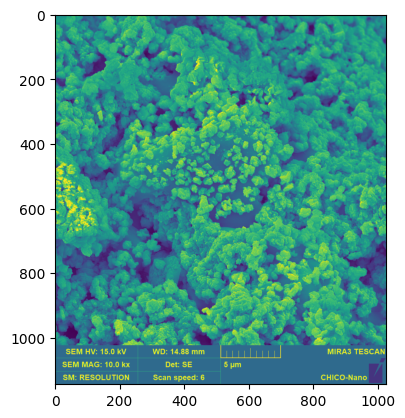


0: 640x576 1 frisbee, 100 sports balls, 1 bottle, 9 cups, 48 bowls, 6 apples, 112 oranges, 16 mouses, 1 clock, 5 scissorss, 1 toothbrush, 167.8ms
Speed: 4.5ms preprocess, 167.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 576)


In [ ]:
img = tiff.imread('Ita_19 CuO NPs_13.tif')

# mostrar imagem
plt.imshow(img)
plt.show()

# Se a imagem for monocanal, converta para RGB (YOLO espera 3 canais)
if img.ndim == 2:
    img = np.stack([img]*3, axis=-1)
# Carregue o modelo YOLOv8 treinado para partículas
model = YOLO('yolov8n.pt')

# Realize a inferência
results = model(img) # aplica o modelo treinado em uma nova imagem para detectar e reconhecer objetos presentes nela, gerando previsões.

> ## Bounding boxes

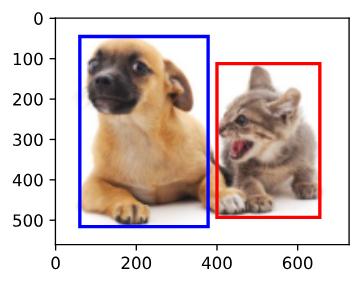

In [ ]:
# Extraia as bounding boxes
boxes = results[0].boxes.xyxy.cpu().numpy()  # formato: [x1, y1, x2, y2]

Número de partículas detectadas: 300


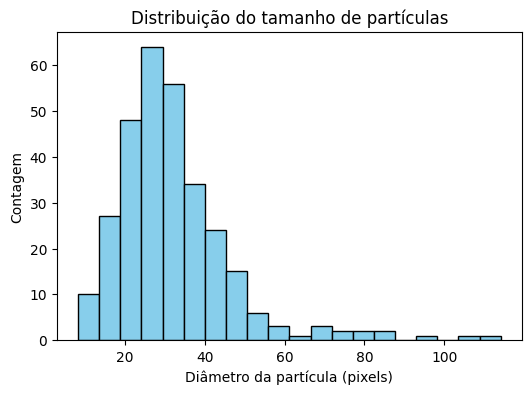

In [ ]:
# Extraia as bounding boxes
boxes = results[0].boxes.xyxy.cpu().numpy()  # formato: [x1, y1, x2, y2]
# Conte o número de partículas detectadas
num_particles = len(boxes) # cada box é uma partícula
print(f'Número de partículas detectadas: {num_particles}')

# Calcule o diâmetro (média entre largura e altura da caixa)
sizes = []
for box in boxes:
    x1, y1, x2, y2 = box
    width = x2 - x1
    height = y2 - y1
    diameter = (width + height) / 2  # ou use sqrt(width*height) para área equivalente
    sizes.append(diameter)

# Crie o DataFrame
df = pd.DataFrame({'particle_diameter_px': sizes})
plt.figure(figsize=(6, 4))
plt.hist(df['particle_diameter_px'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Diâmetro da partícula (pixels)')
plt.ylabel('Contagem')
plt.title('Distribuição do tamanho de partículas')
plt.show()

In [ ]:
df #dataframe (planilha)

,particle_diameter_px
0,29.203239
1,11.625710
2,52.344360
3,17.658020
4,36.078583
...,...
295,33.626907
296,40.872749
297,15.943085
298,27.627289


In [ ]:
# Calcula e imprime o valor médio e o desvio padrão do diâmetro das partículas
mean_diameter = df['particle_diameter_px'].mean()
std_diameter = df['particle_diameter_px'].std()  # desvio padrão amostral (ddof=1 por padrão)

print(f'Valor médio do diâmetro das partículas (pixels): {mean_diameter:.2f}')
print(f'Desvio padrão do diâmetro das partículas (pixels): {std_diameter:.2f}')

Valor médio do diâmetro das partículas (pixels): 32.20
Desvio padrão do diâmetro das partículas (pixels): 14.71


--------------------------------------------------------------------------------

Para ler imagens em .JPEG, utiliza-se a biblioteca **import cv2**

Exemplo

```
import cv2

# Leitura da imagem JPEG
imagem = cv2.imread('nome_da_imagem.jpeg')

# Convertendo a imagem para RGB (OpenCV lê em BGR)
image_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar com matplotlib
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

```

$ \ $


--------------------------------------------------------------------------------


